In [1]:
import numpy as np
import vegas
import math
import matplotlib.pyplot as plt

In [2]:
def potentialSub(x):
    return (1/2)*(x**2)

def S_Sum(x,a,m,N):
    latSum = 0
    latSum += (m/(2*a)) * ((x[0]-x_0)**2) + a*potentialSub(x_0)
    for j in range(0,N-2):
        latSum += (m/(2*a)) * ((x[j+1]-x[j])**2) + a*potentialSub(x[j])
    latSum += (m/(2*a)) * ((x_0-x[-1])**2) + a*potentialSub(x[-1])
    return latSum

def G_integral(x):
    N = 7
    T = 4
    a = T/N
    m=1
    exp_power = S_Sum(x,a,m,N)
    const = ((m/(2*np.pi*a))**(N/2))
    return (const*(math.exp(-exp_power)))

def G_integral_norm(x):
    N = 7
    T = 4
    a = T/N
    m=1
    latSum = 0
    for j in range(0,N-1):
        latSum += (m/(2*a)) * ((x[j+1]-x[j])**2) + a*potentialSub(x[j])
    latSum += (m/(2*a)) * ((x[0]-x[-1])**2) + a*potentialSub(x[-1])

    exp_power = latSum
    const = ((m/(2*np.pi*a))**(N/2))
    return (const*(math.exp(-exp_power)))

def actual(x, T):
    #E0 = 1/2
    xE0top = math.exp((-(x**2))/2)
    xE0bottom = (np.pi**(1/4))
    xE0 = xE0top/xE0bottom
    return xE0**2#*(math.exp(-E0*T)))

def compute_integral(N):
    limits = [[-5, 5]]*(N-1)
    integ = vegas.Integrator(limits)
    result = integ(G_integral, nitn=80, neval=20000)
    #print(result.summary())
    #print('result = %s    Q = %.2f' % (result, result.Q))
    #print('actual value is', actual(2, 4))
    #print(type(result))
    return result.mean

def compute_integral_norm(N):
    limits = [[-5, 5]]*(N)
    integ = vegas.Integrator(limits)
    result = integ(G_integral_norm, nitn=80, neval=30000)
    return result.mean

0.07991453529360351
0.079845508523395
0.07926897557436574
0.07809132559026608
0.0767929923272074
0.07502980275608817
0.07301924322857513
0.07067373228401244
0.06804527331899772
0.06532755951408388
0.06227126308746111
0.05901063081539961
0.05574255837534518
0.05247940142462965
0.04892112609163483
0.04541733748743723
0.04213033860469301
0.038748213392387876
0.035540993626347835
0.03241309069111047
0.029351389675178932
0.026503166808606253
0.023817411275450995
0.021271348400477924
0.018892668951754354
0.01674564468431664
0.01472792760647595
0.012866159679939216
0.011235808332534762
0.009753062232124552
0.008403142169032795
0.007211004873782519
0.006169989815860488
0.005244337121711325
0.004432275636987534
0.00372668921716833
0.003125864244588946
0.0026018720833231833
0.0021560746781714136


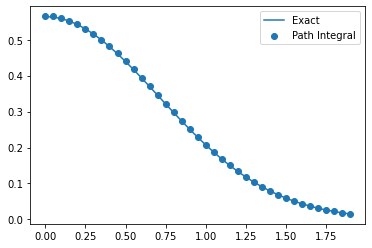

In [3]:
T = 4
E0 = 1/2

x_values = []
act_y = []

prop_y = []
N = 7
a = T/N
m=1
area = 0

for z in range(0,39):
    x_0 = z*0.05
    x_values += [x_0]
    act_y += [actual(x_0, 4)]
    temp = compute_integral(N)
    print(temp)
    prop_y += [temp]


area = compute_integral_norm(N)

for test in range(0, len(prop_y)):
    prop_y[test] = prop_y[test]*(1/area)


plt.plot(x_values,act_y, label='Exact')
plt.scatter(x_values,prop_y, label='Path Integral')
plt.legend()
plt.show()


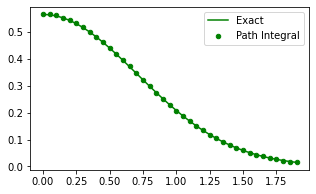

In [12]:
plt.figure(figsize=(5,3))
plt.plot(x_values,act_y, label='Exact', color='green')
plt.scatter(x_values,prop_y, label='Path Integral',s=20,color='green')
plt.legend()
plt.show()

In [13]:
x_values.index(1.)

20

In [14]:
prop_y[20]

0.20758393830951458

In [16]:
act_y[20]

0.20755374871029733

In [18]:
(abs(act_y[20]-prop_y[20])/act_y[20])*100

0.014545436738598103